In [1]:
import numpy as np
import pandas
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
import seaborn as sns
import matplotlib.pyplot as plt
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

import tensorflow as tf
from tensorflow import keras
import sklearn.metrics as met

In [2]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

data = pd.read_excel("input/GS.xlsx")
data.head()

,C1 (Mass Fraction),C2 (Mass Fraction),C3 (Mass Fraction),IC4 (Mass Fraction),NC4 (Mass Fraction),N2 (Mass Fraction),CO2 (Mass Fraction),H2S (Mass Fraction),NG Mass Flow (Kg/hr),Reg Molar RR,HEX_T-HOT (C),P-OUT (bar),Sweetened Gas (CO2),Sweetened Gas (H2S),Water Make-up (Mole/hr),MDEA Make-up (KMole/hr),Exergy (KW),HHV (Kj/cum)
0,70.958308,6.450755,6.450755,3.870453,3.870453,4.644544,2.983474,0.771256,620082.425,2.3,45,4,0.013037,0.000001,325003.743,0.011679,89249.0449,43350.8677
1,70.958308,6.450755,6.450755,3.870453,3.870453,4.644544,2.983474,0.771256,620082.425,2.3,45,4,0.013037,0.000001,325003.743,0.011679,89249.0449,43350.8677
2,70.958308,6.450755,6.450755,3.870453,3.870453,4.644544,2.983474,0.771256,620082.425,2.3,45,16,0.013037,0.000001,323881.211,0.011679,89249.0357,43350.8780
3,70.958308,6.450755,6.450755,3.870453,3.870453,4.644544,2.983474,0.771256,620082.425,2.3,45,16,0.013037,0.000001,323881.211,0.011679,89249.0357,43350.8780
4,70.958308,6.450755,6.450755,3.870453,3.870453,4.644544,2.983474,0.771256,620082.425,2.7,45,4,0.013031,0.000001,324521.213,0.011694,89248.6265,43351.1203


In [3]:
data.describe()

,C1 (Mass Fraction),C2 (Mass Fraction),C3 (Mass Fraction),IC4 (Mass Fraction),NC4 (Mass Fraction),N2 (Mass Fraction),CO2 (Mass Fraction),H2S (Mass Fraction),NG Mass Flow (Kg/hr),Reg Molar RR,HEX_T-HOT (C),P-OUT (bar),Sweetened Gas (CO2),Sweetened Gas (H2S),Water Make-up (Mole/hr),MDEA Make-up (KMole/hr),Exergy (KW),HHV (Kj/cum)
count,511256.000000,511256.000000,511256.000000,511256.000000,511256.000000,511256.000000,511256.000000,511256.000000,511256.000000,511256.000000,511256.000000,511256.000000,511256.000000,5.112560e+05,511256.000000,511256.000000,511256.000000,511256.000000
mean,77.219948,5.521694,5.474263,2.883633,2.596500,3.784581,1.966773,0.552608,490462.837763,2.822226,60.534803,9.639564,0.008216,6.813112e-07,434007.205237,0.009151,74146.317994,42541.339365
std,3.230443,1.689582,1.543937,1.480793,1.772752,1.320244,1.150108,0.360680,36750.492800,0.382141,12.236502,4.523169,0.004853,2.185965e-07,95250.410143,0.001110,5668.953436,945.019554
min,64.666010,2.428475,2.440739,0.800476,0.251011,1.600925,0.166228,0.041771,371768.168000,2.300000,45.000000,4.000000,0.000691,1.999793e-07,310946.421000,0.006611,60692.020100,39250.486200
25%,75.115312,3.976884,4.521433,1.285921,0.675283,2.580479,0.889508,0.303332,465258.168000,2.300000,45.000000,4.000000,0.003620,5.223182e-07,326260.612750,0.008163,70125.281725,41931.633800
50%,77.181610,5.634227,5.219382,2.864820,2.789015,3.705235,1.834664,0.682587,488638.279000,2.700000,60.000000,10.000000,0.007516,6.616520e-07,389839.030500,0.009267,73743.904700,42559.032950
75%,79.289207,6.875620,6.682164,4.244600,4.298018,4.718171,2.926325,0.893440,512782.425000,3.300000,75.000000,14.000000,0.012313,8.164642e-07,494297.100750,0.010137,77804.438400,43163.743175
max,90.431421,10.070793,10.070793,6.138764,6.087227,7.377651,4.874693,1.270933,620082.425000,3.300000,75.000000,16.000000,0.019419,1.524292e-06,575764.841000,0.011831,89588.989900,46387.057000


In [4]:
data.isnull().sum().sort_values(ascending = True)

C1 (Mass Fraction)         0
MDEA Make-up (KMole/hr)    0
Water Make-up (Mole/hr)    0
Sweetened Gas (H2S)        0
Sweetened Gas (CO2)        0
P-OUT (bar)                0
HEX_T-HOT (C)              0
Reg Molar RR               0
NG Mass Flow (Kg/hr)       0
H2S (Mass Fraction)        0
CO2 (Mass Fraction)        0
N2 (Mass Fraction)         0
NC4 (Mass Fraction)        0
IC4 (Mass Fraction)        0
C3 (Mass Fraction)         0
C2 (Mass Fraction)         0
Exergy (KW)                0
HHV (Kj/cum)               0
dtype: int64

In [5]:
data = data.dropna()

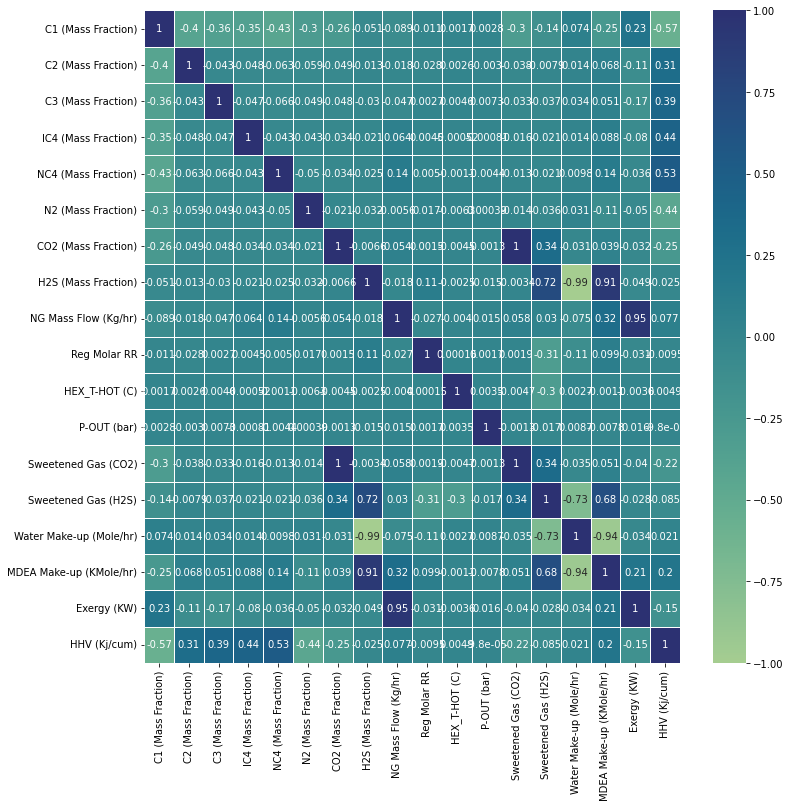

In [6]:
corr_matrix = data.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr_matrix,vmin=-1, cmap="crest", annot=True, linewidth=.6 )
plt.show()

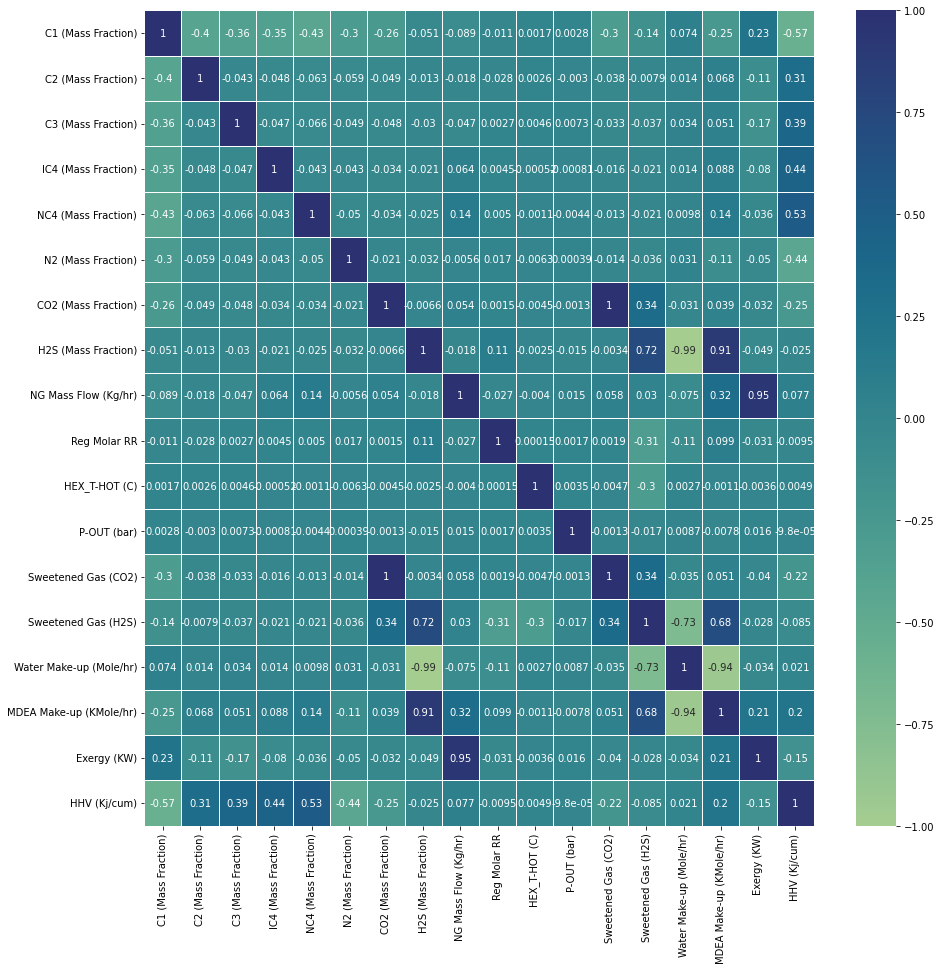

In [7]:

corr_matrix = data.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix,vmin=-1, cmap="crest", annot=True, linewidth=.5 )
plt.show()

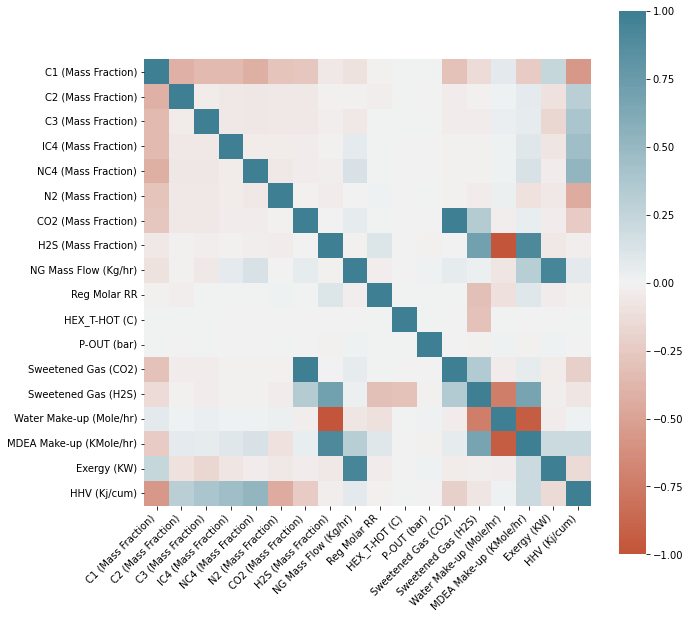

In [8]:
corr = data.corr()
plt.figure(figsize=(10, 10))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [9]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data,test_size=0.20,random_state=40)
train, valid=train_test_split(train, test_size=0.125, random_state=40)

In [10]:
train.describe()

,C1 (Mass Fraction),C2 (Mass Fraction),C3 (Mass Fraction),IC4 (Mass Fraction),NC4 (Mass Fraction),N2 (Mass Fraction),CO2 (Mass Fraction),H2S (Mass Fraction),NG Mass Flow (Kg/hr),Reg Molar RR,HEX_T-HOT (C),P-OUT (bar),Sweetened Gas (CO2),Sweetened Gas (H2S),Water Make-up (Mole/hr),MDEA Make-up (KMole/hr),Exergy (KW),HHV (Kj/cum)
count,357878.000000,357878.000000,357878.000000,357878.000000,357878.000000,357878.000000,357878.000000,357878.000000,357878.000000,357878.000000,357878.000000,357878.000000,357878.000000,3.578780e+05,357878.000000,357878.000000,357878.000000,357878.000000
mean,77.216775,5.522655,5.474947,2.884577,2.596279,3.783693,1.968359,0.552715,490453.116917,2.822101,60.540698,9.637661,0.008223,6.814907e-07,433976.233971,0.009151,74142.753312,42541.971019
std,3.231980,1.689950,1.544384,1.481046,1.772594,1.319685,1.150340,0.360588,36762.488441,0.381866,12.236925,4.523427,0.004854,2.187411e-07,95220.323077,0.001110,5669.903453,946.057769
min,64.666010,2.428475,2.440739,0.800476,0.251011,1.600925,0.166228,0.041771,371768.168000,2.300000,45.000000,4.000000,0.000691,1.999793e-07,310946.421000,0.006611,60692.020100,39250.492300
25%,75.113299,3.977767,4.520596,1.285921,0.677680,2.578409,0.891488,0.304498,465186.881000,2.300000,45.000000,4.000000,0.003627,5.228015e-07,326246.943500,0.008164,70123.573200,41932.647550
50%,77.181610,5.633089,5.220026,2.866104,2.789015,3.705235,1.836797,0.682284,488618.168000,2.700000,60.000000,10.000000,0.007523,6.615652e-07,389846.411000,0.009267,73733.092200,42559.501950
75%,79.287534,6.876684,6.683383,4.244989,4.297976,4.713117,2.928211,0.893273,512778.168000,3.300000,75.000000,14.000000,0.012321,8.165946e-07,494209.563750,0.010137,77804.416450,43164.994075
max,90.431421,10.070793,10.070793,6.138764,6.087227,7.377651,4.874693,1.270933,620082.425000,3.300000,75.000000,16.000000,0.019419,1.524292e-06,575738.566000,0.011831,89588.989900,46387.054800


In [11]:
test.describe()

,C1 (Mass Fraction),C2 (Mass Fraction),C3 (Mass Fraction),IC4 (Mass Fraction),NC4 (Mass Fraction),N2 (Mass Fraction),CO2 (Mass Fraction),H2S (Mass Fraction),NG Mass Flow (Kg/hr),Reg Molar RR,HEX_T-HOT (C),P-OUT (bar),Sweetened Gas (CO2),Sweetened Gas (H2S),Water Make-up (Mole/hr),MDEA Make-up (KMole/hr),Exergy (KW),HHV (Kj/cum)
count,102252.000000,102252.000000,102252.000000,102252.000000,102252.000000,102252.000000,102252.000000,102252.000000,102252.000000,102252.000000,102252.000000,102252.000000,102252.000000,1.022520e+05,102252.000000,102252.000000,102252.000000,102252.000000
mean,77.219484,5.516468,5.471879,2.883207,2.601723,3.788222,1.965914,0.553102,490490.001286,2.822421,60.478494,9.645660,0.008212,6.817667e-07,433859.953181,0.009153,74150.071217,42540.288906
std,3.229039,1.689565,1.542762,1.480998,1.773693,1.322180,1.148673,0.361078,36696.480581,0.383069,12.237692,4.522015,0.004846,2.189557e-07,95374.499506,0.001111,5664.184047,943.238683
min,64.666010,2.428475,2.445655,0.801143,0.251011,1.602514,0.166228,0.041771,371768.168000,2.300000,45.000000,4.000000,0.000691,2.000421e-07,311065.211000,0.006613,60692.029100,39250.486200
25%,75.113299,3.972223,4.521433,1.285659,0.676153,2.583136,0.891488,0.302316,465382.425000,2.300000,45.000000,4.000000,0.003623,5.218428e-07,326201.411750,0.008160,70128.500825,41932.112025
50%,77.175724,5.631429,5.219125,2.867336,2.793406,3.705406,1.843964,0.684018,488686.881000,2.700000,60.000000,10.000000,0.007560,6.628565e-07,389761.276500,0.009271,73753.191700,42557.128700
75%,79.285898,6.872742,6.671899,4.244600,4.304133,4.736414,2.920067,0.894777,512782.425000,3.300000,75.000000,14.000000,0.012299,8.171973e-07,494468.913000,0.010141,77793.774850,43159.131350
max,90.431421,10.070793,10.070793,6.138764,6.080750,7.377651,4.874693,1.250986,620082.425000,3.300000,75.000000,16.000000,0.019419,1.523055e-06,575742.764000,0.011792,89588.987800,46386.954300


In [12]:
valid.describe()

,C1 (Mass Fraction),C2 (Mass Fraction),C3 (Mass Fraction),IC4 (Mass Fraction),NC4 (Mass Fraction),N2 (Mass Fraction),CO2 (Mass Fraction),H2S (Mass Fraction),NG Mass Flow (Kg/hr),Reg Molar RR,HEX_T-HOT (C),P-OUT (bar),Sweetened Gas (CO2),Sweetened Gas (H2S),Water Make-up (Mole/hr),MDEA Make-up (KMole/hr),Exergy (KW),HHV (Kj/cum)
count,51126.000000,51126.000000,51126.000000,51126.000000,51126.000000,51126.000000,51126.000000,51126.000000,51126.000000,51126.000000,51126.00000,51126.000000,51126.000000,5.112600e+04,51126.000000,51126.000000,51126.000000,51126.000000
mean,77.243091,5.525417,5.474244,2.877878,2.587603,3.783511,1.957384,0.550873,490476.555876,2.822711,60.60615,9.640692,0.008175,6.791437e-07,434518.505793,0.009144,74163.764038,42539.018755
std,3.222447,1.687051,1.543177,1.478627,1.771972,1.320293,1.151325,0.360531,36775.134196,0.382211,12.23092,4.523749,0.004857,2.168496e-07,95212.865149,0.001108,5671.910517,941.312150
min,64.666010,2.447017,2.440739,0.800476,0.251011,1.600925,0.166255,0.041771,371768.168000,2.300000,45.00000,4.000000,0.000699,2.038969e-07,311385.172000,0.006611,60692.046800,39250.552700
25%,75.145315,3.977501,4.521445,1.284087,0.667944,2.580969,0.870344,0.301015,465186.881000,2.300000,45.00000,4.000000,0.003573,5.203636e-07,326470.482000,0.008160,70128.882675,41924.121500
50%,77.187964,5.650474,5.213443,2.855638,2.785465,3.703083,1.792825,0.681420,488588.279000,2.700000,60.00000,10.000000,0.007411,6.601867e-07,389950.511000,0.009258,73781.268800,42558.290050
75%,79.322303,6.871911,6.676100,4.239460,4.288376,4.714133,2.920067,0.891131,513058.168000,3.300000,75.00000,14.000000,0.012296,8.139392e-07,494714.960250,0.010126,77826.297750,43162.991100
max,90.431421,10.070793,10.070793,6.138764,6.080750,7.377651,4.869445,1.240280,620082.425000,3.300000,75.00000,16.000000,0.019387,1.523055e-06,575764.841000,0.011827,89588.494100,46387.057000


In [13]:
col_randoms = ["C1 (Mass Fraction)", "C2 (Mass Fraction)","C3 (Mass Fraction)","IC4 (Mass Fraction)","NC4 (Mass Fraction)","N2 (Mass Fraction)","CO2 (Mass Fraction)","H2S (Mass Fraction)","NG Mass Flow (Kg/hr)","Reg Molar RR","HEX_T-HOT (C)","P-OUT (bar)"]
col_target1 = ["Exergy (KW)"]

In [14]:
train_feature = train[col_randoms ]
train_target = train[col_target1]
train_feature.shape
train_target.shape

(357878, 1)

In [15]:
val_feature = valid[col_randoms]
val_target = valid[col_target1]

In [16]:
test_feature = test[col_randoms]
test_target = test[col_target1]

In [17]:
train_feature.describe()

,C1 (Mass Fraction),C2 (Mass Fraction),C3 (Mass Fraction),IC4 (Mass Fraction),NC4 (Mass Fraction),N2 (Mass Fraction),CO2 (Mass Fraction),H2S (Mass Fraction),NG Mass Flow (Kg/hr),Reg Molar RR,HEX_T-HOT (C),P-OUT (bar)
count,357878.000000,357878.000000,357878.000000,357878.000000,357878.000000,357878.000000,357878.000000,357878.000000,357878.000000,357878.000000,357878.000000,357878.000000
mean,77.216775,5.522655,5.474947,2.884577,2.596279,3.783693,1.968359,0.552715,490453.116917,2.822101,60.540698,9.637661
std,3.231980,1.689950,1.544384,1.481046,1.772594,1.319685,1.150340,0.360588,36762.488441,0.381866,12.236925,4.523427
min,64.666010,2.428475,2.440739,0.800476,0.251011,1.600925,0.166228,0.041771,371768.168000,2.300000,45.000000,4.000000
25%,75.113299,3.977767,4.520596,1.285921,0.677680,2.578409,0.891488,0.304498,465186.881000,2.300000,45.000000,4.000000
50%,77.181610,5.633089,5.220026,2.866104,2.789015,3.705235,1.836797,0.682284,488618.168000,2.700000,60.000000,10.000000
75%,79.287534,6.876684,6.683383,4.244989,4.297976,4.713117,2.928211,0.893273,512778.168000,3.300000,75.000000,14.000000
max,90.431421,10.070793,10.070793,6.138764,6.087227,7.377651,4.874693,1.270933,620082.425000,3.300000,75.000000,16.000000


In [18]:
test_target.describe()

,Exergy (KW)
count,102252.000000
mean,74150.071217
std,5664.184047
min,60692.029100
25%,70128.500825
50%,73753.191700
75%,77793.774850
max,89588.987800


In [19]:
sc_train = pd.DataFrame(columns=train_feature.columns)
sc_train[sc_train.columns] = sc.fit_transform(train_feature)
sc_test= pd.DataFrame(columns=test_feature.columns , index=test_feature.index)
sc_test[sc_test.columns] = sc.fit_transform(test_feature)
sc_valid=pd.DataFrame(columns=val_feature.columns, index=val_feature.index)
sc_valid[sc_valid.columns]=sc.fit_transform(val_feature)

In [20]:
sc_valid.describe()

,C1 (Mass Fraction),C2 (Mass Fraction),C3 (Mass Fraction),IC4 (Mass Fraction),NC4 (Mass Fraction),N2 (Mass Fraction),CO2 (Mass Fraction),H2S (Mass Fraction),NG Mass Flow (Kg/hr),Reg Molar RR,HEX_T-HOT (C),P-OUT (bar)
count,5.112600e+04,5.112600e+04,5.112600e+04,5.112600e+04,5.112600e+04,5.112600e+04,5.112600e+04,5.112600e+04,5.112600e+04,5.112600e+04,5.112600e+04,5.112600e+04
mean,-9.655548e-16,1.188268e-16,1.225793e-16,1.070136e-16,6.434716e-17,2.856013e-16,1.534325e-16,-3.329931e-16,-4.992117e-16,1.939796e-16,1.688592e-16,-5.336784e-17
std,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00
min,-3.902998e+00,-1.824740e+00,-1.965773e+00,-1.404967e+00,-1.318652e+00,-1.653123e+00,-1.555726e+00,-1.412102e+00,-3.227984e+00,-1.367609e+00,-1.275971e+00,-1.246919e+00
25%,-6.509948e-01,-9.175364e-01,-6.174327e-01,-1.077897e+00,-1.083356e+00,-9.108233e-01,-9.441728e-01,-6.930321e-01,-6.876908e-01,-1.367609e+00,-1.275971e+00,-1.246919e+00
50%,-1.710728e-02,7.412865e-02,-1.690044e-01,-1.504118e-02,1.116631e-01,-6.091731e-02,-1.429311e-01,3.621017e-01,-5.134707e-02,-3.210574e-01,-4.955927e-02,7.942790e-02
75%,6.452340e-01,7.981425e-01,7.788271e-01,9.208510e-01,9.598290e-01,7.048670e-01,8.361602e-01,9.437794e-01,6.140517e-01,1.248770e+00,1.176853e+00,9.636589e-01
max,4.092684e+00,2.694299e+00,2.978657e+00,2.205369e+00,1.971353e+00,2.722255e+00,2.529337e+00,1.912218e+00,3.524314e+00,1.248770e+00,1.176853e+00,1.405774e+00


In [21]:
test_target.describe()

,Exergy (KW)
count,102252.000000
mean,74150.071217
std,5664.184047
min,60692.029100
25%,70128.500825
50%,73753.191700
75%,77793.774850
max,89588.987800


In [22]:
model1 = Sequential()
#model.add(Dense(33, input_dim=11, kernel_initializer= 'normal' , activation='relu'))
model1.add(Dense(24, kernel_initializer= 'normal' , activation= 'relu' ))
#model.add(Dense(33, kernel_initializer= 'normal' , activation= 'relu' ))
model1.add(Dense(12, kernel_initializer= 'normal' , activation= 'relu' ))
model1.add(Dense(1, kernel_initializer= 'normal'))
#

In [23]:
model1.compile(loss= 'mean_squared_error' , optimizer= 'adam', metrics=['accuracy'])

In [24]:
#اگر کار نکرد و چیزی نشون نداد خپمساوی را بردار
# epochs_hist= build_ann()
#epochs_hist=model.fit(sc_train, train_target, epochs=20, batch_size=500, validation_data=(sc_valid,val_target))

In [25]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [26]:
#epochs_hist=model.fit(sc_train, train_target, epochs=100, batch_size=5, validation_data=(sc_valid,val_target), callbacks=callback)
epochs_hist=model1.fit(sc_train, train_target, epochs=50, batch_size=2, validation_data=(sc_valid,val_target))

Epoch 1/50
178939/178939 [==============================] - 201s 1ms/step - loss: 95013008.0000 - accuracy: 0.0000e+00 - val_loss: 24784.4941 - val_accuracy: 0.0000e+00
Epoch 2/50
178939/178939 [==============================] - 208s 1ms/step - loss: 28930.6504 - accuracy: 0.0000e+00 - val_loss: 25508.3574 - val_accuracy: 0.0000e+00
Epoch 3/50
178939/178939 [==============================] - 213s 1ms/step - loss: 28948.2227 - accuracy: 0.0000e+00 - val_loss: 25928.4492 - val_accuracy: 0.0000e+00
Epoch 4/50
178939/178939 [==============================] - 215s 1ms/step - loss: 28787.6621 - accuracy: 0.0000e+00 - val_loss: 28618.9609 - val_accuracy: 0.0000e+00
Epoch 5/50
178939/178939 [==============================] - 209s 1ms/step - loss: 28589.7344 - accuracy: 0.0000e+00 - val_loss: 24545.6504 - val_accuracy: 0.0000e+00
Epoch 6/50
178939/178939 [==============================] - 213s 1ms/step - loss: 28580.3574 - accuracy: 0.0000e+00 - val_loss: 33272.5430 - val_accuracy: 0.0000e+00
E

In [27]:
epochs_hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [28]:
y_pred1 = model1.predict(sc_test)
print(y_pred1)

[[75680.58 ]
 [75394.234]
 [87208.35 ]
 ...
 [84986.445]
 [73671.43 ]
 [78618.11 ]]


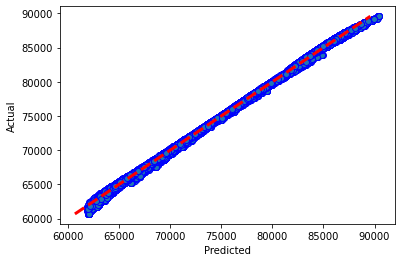

In [29]:
fig, ax = plt.subplots()
ax.scatter(y_pred1, test_target, edgecolors=(0, 0, 1))
ax.plot([test_target.min(), test_target.max()], [test_target.min(), test_target.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

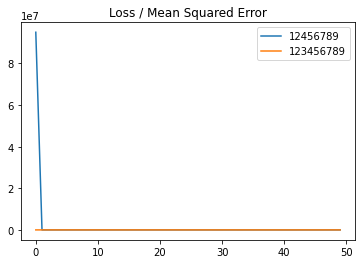

In [30]:
import matplotlib.pyplot as pyplot

pyplot.title('Loss / Mean Squared Error')
pyplot.plot(epochs_hist.history['loss'], label='12456789')
pyplot.plot(epochs_hist.history['val_loss'], label='123456789')
pyplot.legend()
pyplot.show()

In [31]:
result = model1.evaluate(sc_test, test_target)


3196/3196 [==============================] - 5s 1ms/step - loss: 23922.5430 - accuracy: 0.0000e+00


In [32]:
results = pd.DataFrame(columns=["model", "r2", "mae", "rmse", "potential"])

In [33]:

def get_regression_metrics(y_pred1):
    global y_test
    return (
        met.r2_score(test_target, y_pred1),
        met.mean_absolute_error(test_target, y_pred1),
        np.sqrt(met.mean_squared_error(test_target, y_pred1)))


def print_regression_metrics(y_pred1, model_name, potential):
    global results
    
    # get and print metrics
    r2, mae, rmse = get_regression_metrics(y_pred1)
    print("R2 =   {0:.1f}% \nMAE =  {1:.00000010f} \nRMSE = {2:.00000010f}".format(
        r2*100, mae, rmse))
    
    # save metrics to dataframe
    if not ((results["model"]==model_name).any()):
        rdict = {
            "model": model_name,
            "r2": r2,
            "mae": mae,
            "rmse": rmse,
            "potential": potential}
        results = results.append(rdict, ignore_index=True)
        
    else:
        idx = results.index[results['model'] == model_name].tolist()[0]
        results.at[idx, "r2"] = r2
        results.at[idx, "mae"] = mae
        results.at[idx, "rmse"] = rmse
        results.at[idx, "potential"] = potential

In [34]:
y_pred1_annk = model1.predict(sc_test)

print_regression_metrics(y_pred1_annk, "epochs_hist", "Major")
#utils.plot_regression_results(test_y, y_pred_annk, "epochs_hist")

R2 =   99.9% 
MAE =  105.8989444656 
RMSE = 154.6692545616


C:\Users\mostafa\AppData\Local\Temp\ipykernel_26224\3712686650.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(rdict, ignore_index=True)


C:\Users\mostafa\AppData\Local\Temp\ipykernel_26224\4153984806.py:21: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar(sc)


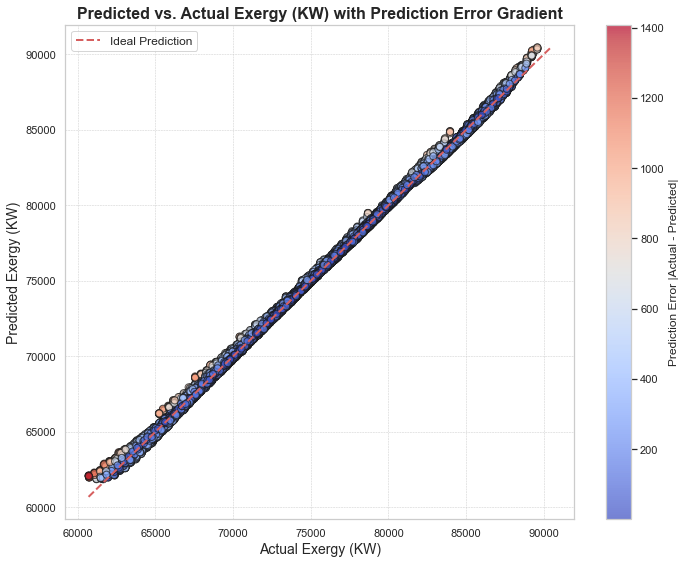

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming test_target is the actual target values for test set
y_test_original = np.array(test_target).flatten()  # Replace with your actual variable if different
y_pred1 = np.array(y_pred1).flatten()

# Set the style for Seaborn
sns.set(style="whitegrid", palette="muted")

# Create the plot
plt.figure(figsize=(10, 8))
sc = plt.scatter(
    y_test_original, y_pred1,
    c=np.abs(y_pred1 - y_test_original),
    cmap="coolwarm", s=50, alpha=0.7, edgecolor="k"
)

# Add color bar to indicate prediction error (absolute difference)
cbar = plt.colorbar(sc)
cbar.set_label("Prediction Error |Actual - Predicted|", fontsize=12)

# Plot a 1:1 reference line
min_val = min(y_test_original.min(), y_pred1.min())
max_val = max(y_test_original.max(), y_pred1.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label="Ideal Prediction")

# Labels and title
plt.xlabel("Actual Exergy (KW)", fontsize=14)
plt.ylabel("Predicted Exergy (KW)", fontsize=14)
plt.title("Predicted vs. Actual Exergy (KW) with Prediction Error Gradient", fontsize=16, fontweight='bold')

# Legend and grid
plt.legend(loc="upper left", fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5)

# Display the plot
plt.tight_layout()
plt.show()

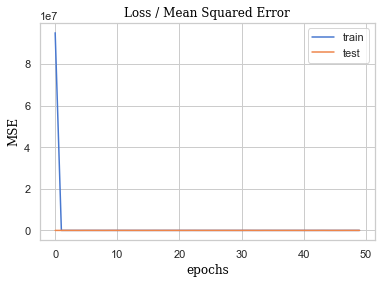

In [36]:
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 12,
        }
pyplot.title('Loss / Mean Squared Error', fontdict=font)
pyplot.plot(epochs_hist.history['loss'], label='train')
pyplot.plot(epochs_hist.history['val_loss'], label='test')

plt.xlabel('epochs', fontdict=font)
plt.ylabel('MSE', fontdict=font)

pyplot.legend()
pyplot.show()

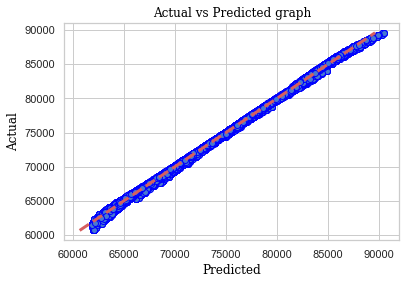

In [37]:
fig, ax = plt.subplots()
ax.scatter(y_pred1, test_target, edgecolors=(0, 0, 1))
ax.plot([test_target.min(), test_target.max()], [test_target.min(), test_target.max()], 'r--', lw=3)
ax.set_xlabel('Predicted', fontdict=font)
ax.set_ylabel('Actual', fontdict=font)
plt.title('Actual vs Predicted graph', fontdict=font)

plt.show()

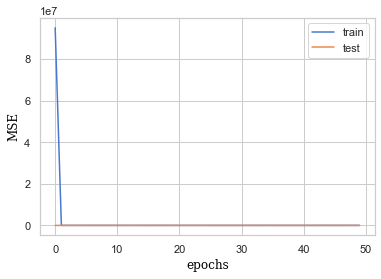

In [38]:
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 12,
        }
pyplot.plot(epochs_hist.history['loss'], label='train')
pyplot.plot(epochs_hist.history['val_loss'], label='test')

plt.xlabel('epochs', fontdict=font)
plt.ylabel('MSE', fontdict=font)

pyplot.legend()
pyplot.show()